In [14]:
import pandas as pd

In [15]:
bq_data_csv = pd.read_csv("markup_train.csv")

In [16]:
bq_data_csv.columns

Index(['file_name', 'department_name', 'user_name', 'Некачественное ГДИС',
       'Влияние ствола скважины', 'Радиальный режим', 'Линейный режим',
       'Билинейный режим', 'Сферический режим', 'Граница постоянного давления',
       'Граница непроницаемый разлом', 'Влияние ствола скважины_details',
       'Радиальный режим_details', 'Линейный режим_details',
       'Билинейный режим_details', 'Сферический режим_details',
       'Граница постоянного давления_details',
       'Граница непроницаемый разлом_details'],
      dtype='object')

In [17]:
bq_data_csv.groupby('Некачественное ГДИС').count()

,file_name,department_name,user_name,Влияние ствола скважины,Радиальный режим,Линейный режим,Билинейный режим,Сферический режим,Граница постоянного давления,Граница непроницаемый разлом,Влияние ствола скважины_details,Радиальный режим_details,Линейный режим_details,Билинейный режим_details,Сферический режим_details,Граница постоянного давления_details,Граница непроницаемый разлом_details
Некачественное ГДИС,,,,,,,,,,,,,,,,,
0,37874,37874,37874,37874,37874,37874,37874,37874,37874,37874,32072,24451,10964,11299,5224,4617,4063
1,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,3486,1404,1247,787,540,257,202


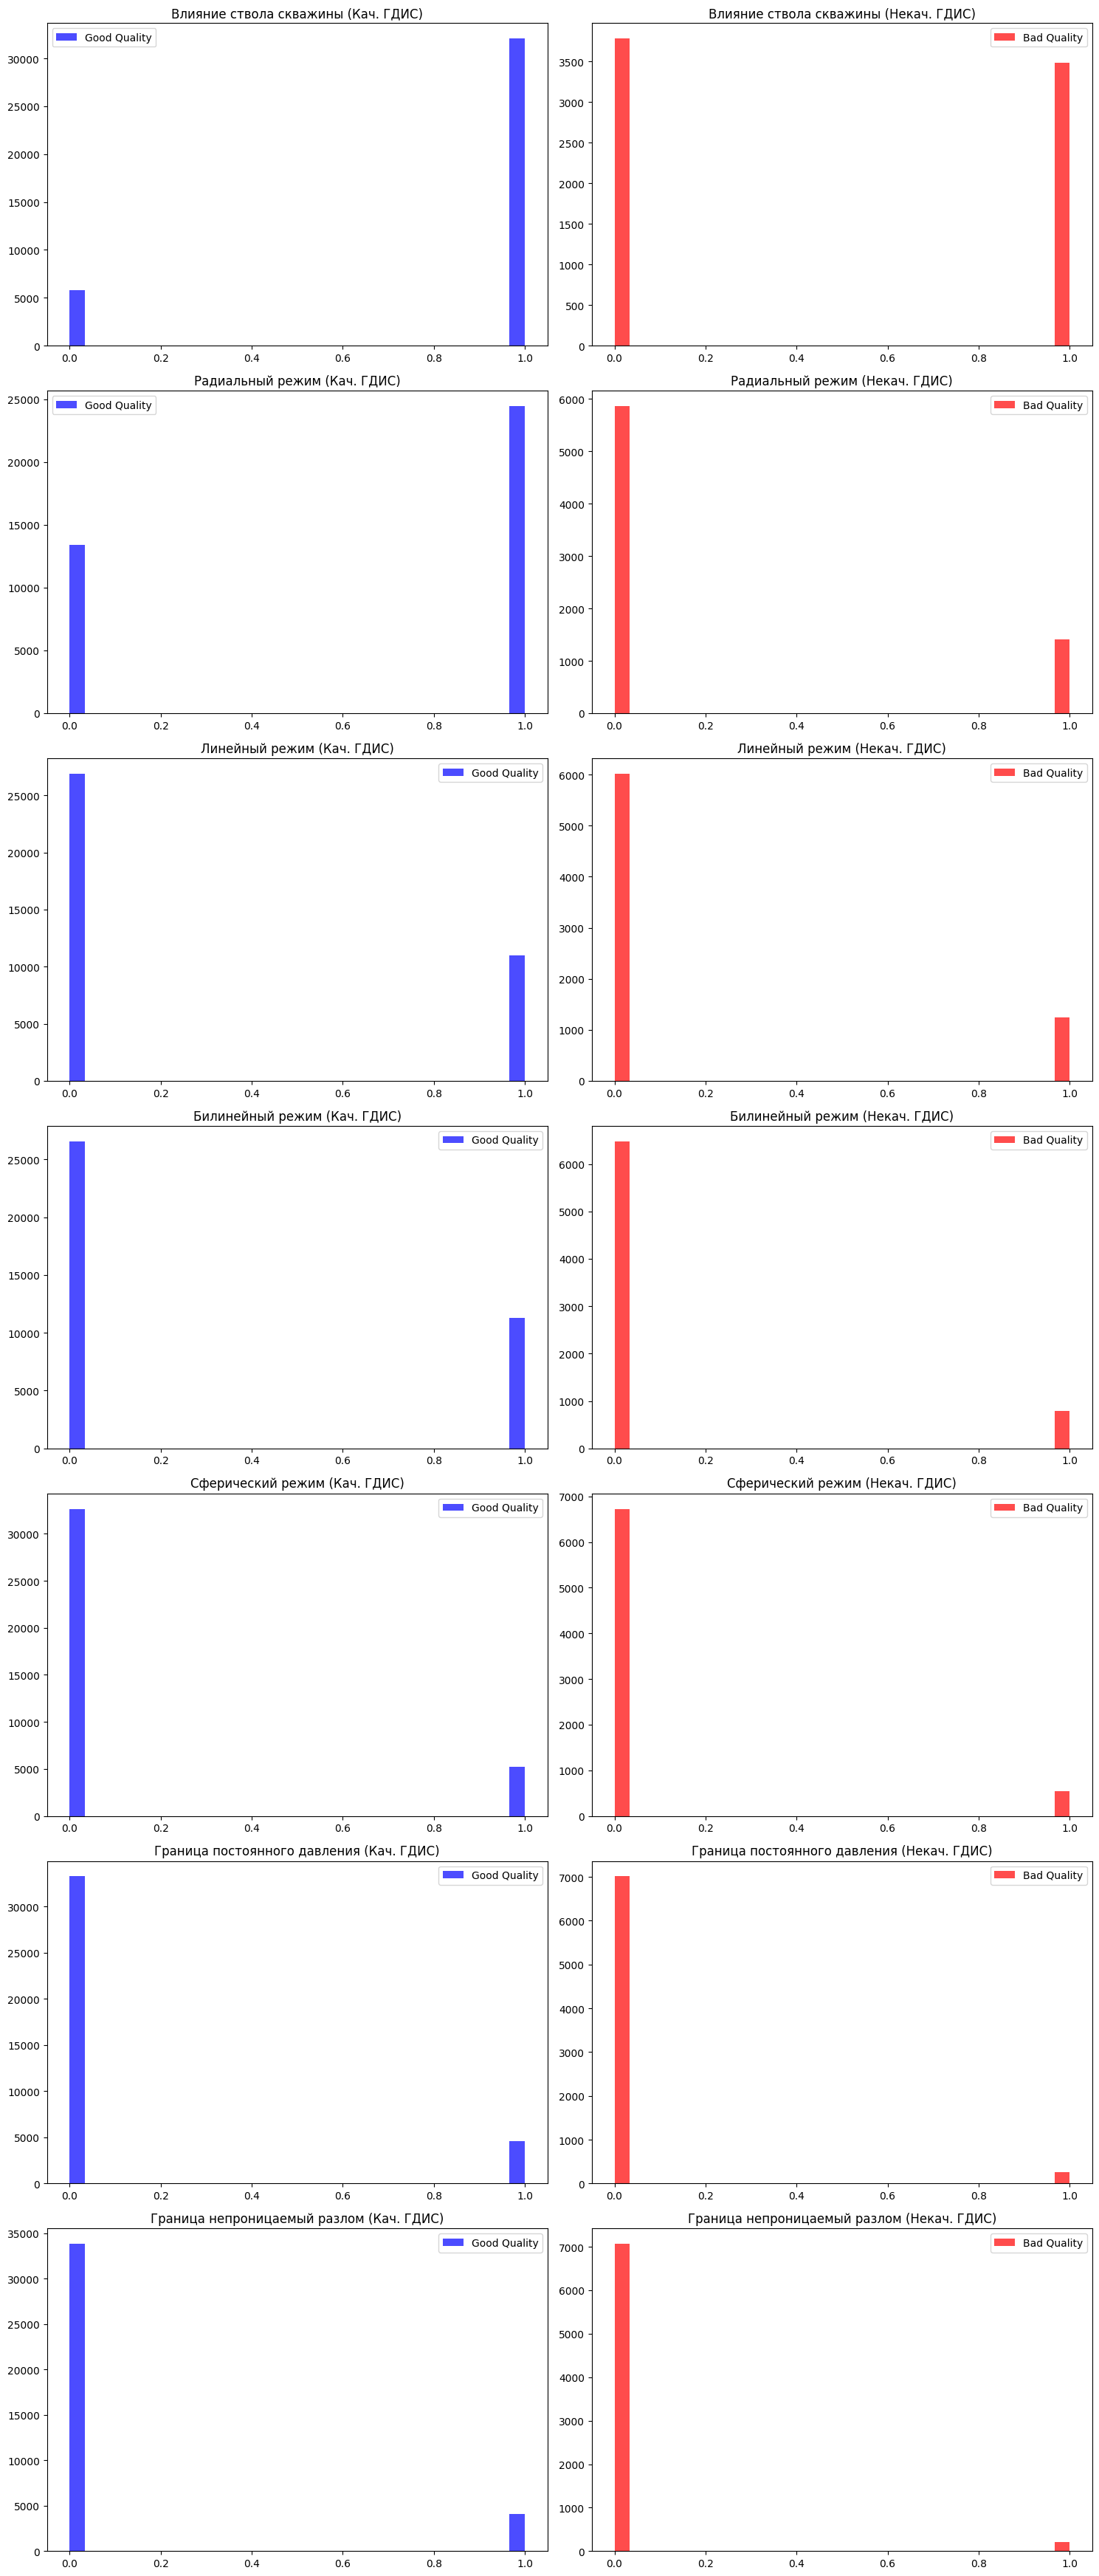

In [18]:
import matplotlib.pyplot as plt

good_quality_data = bq_data_csv[bq_data_csv["Некачественное ГДИС"] == 0]
bad_quality_data = bq_data_csv[bq_data_csv["Некачественное ГДИС"] == 1]

columns = [
       'Влияние ствола скважины', 'Радиальный режим', 'Линейный режим',
       'Билинейный режим', 'Сферический режим', 'Граница постоянного давления',
       'Граница непроницаемый разлом'
]

fig, axes = plt.subplots(nrows=len(columns), ncols=2, figsize=(15, 5 * len(columns)))

for i, column in enumerate(columns):
    # Гистограмма для good_quality_data
    axes[i, 0].hist(good_quality_data[column], bins=30, color='blue', alpha=0.7, label='Good Quality')
    axes[i, 0].set_title(f'{column} (Кач. ГДИС)')
    axes[i, 0].legend()

    # Гистограмма для bad_quality_data
    axes[i, 1].hist(bad_quality_data[column], bins=30, color='red', alpha=0.7, label='Bad Quality')
    axes[i, 1].set_title(f'{column} (Некач. ГДИС)')
    axes[i, 1].legend()

plt.tight_layout()